In [ ]:
from .simulations import simulate_orientation, DEFAULT_FS
from ..data.directivity_data import MatData, PyData
from audio_utils import load_audio, save_audio
import pyroomacoustics as pra
from pathlib import Path
from tqdm import tqdm

In [4]:
speech_file = "../2414_159411_000009_000001.wav"
signal = load_audio(speech_file, DEFAULT_FS)

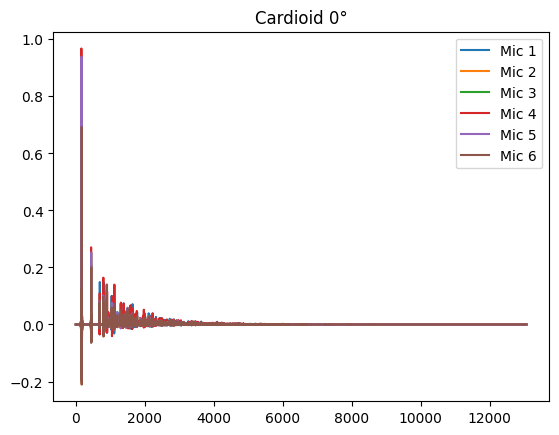

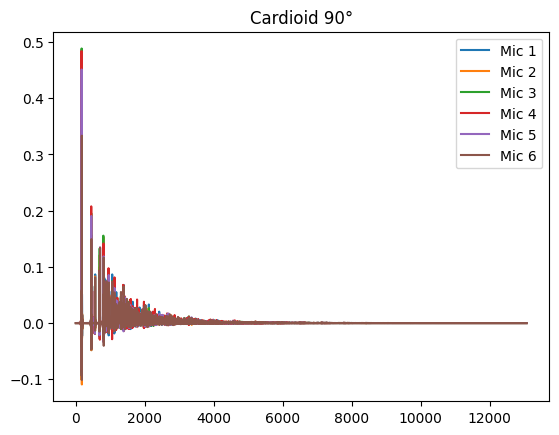

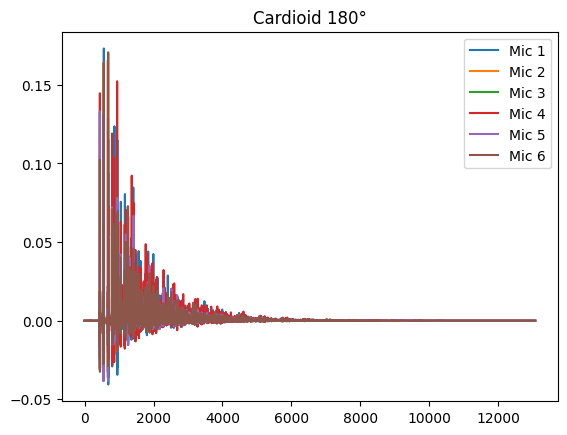

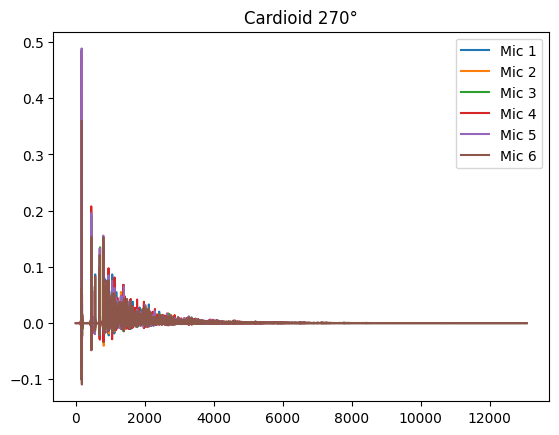

In [5]:
# simulate cardioid source with different orientations
orientations = [0, 90, 180, 270]  # Azimuth angles for the source orientation

for orientation in orientations:
    source_directivity = pra.Cardioid(
        pra.DirectionVector(azimuth=orientation, colatitude=90),
        gain=1.0,
    )
    simulated_signal = simulate_orientation(signal, source_directivity, title=f"Cardioid {orientation}°")
    save_audio(f"cardioid_{orientation}.wav", simulated_signal.T, DEFAULT_FS)

Using measured directivity data from ../3707708/AppliedAcousticsChalmers/sound-source-directivities-2020-03-12/AppliedAcousticsChalmers-sound-source-directivities-f48ec35/DirPat_singing_voice/irs_DirPat_a_open_sweep_N9_reg.mat


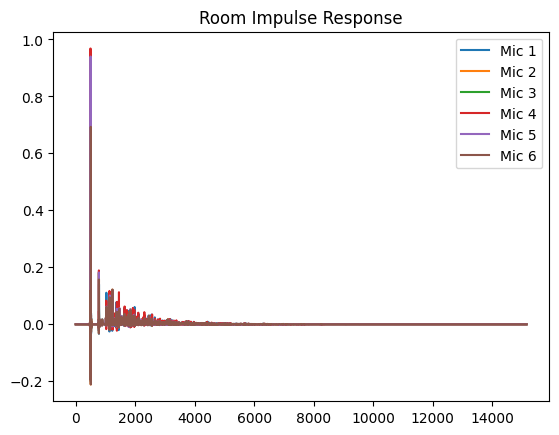

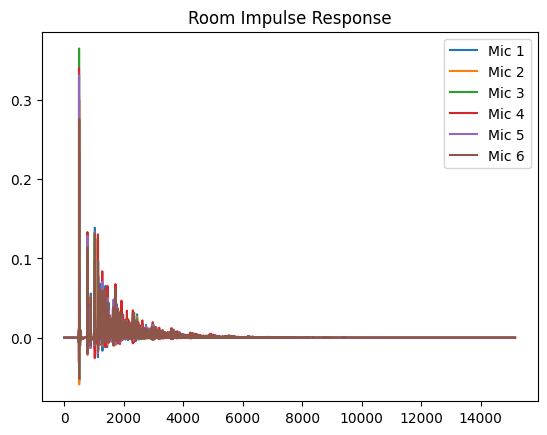

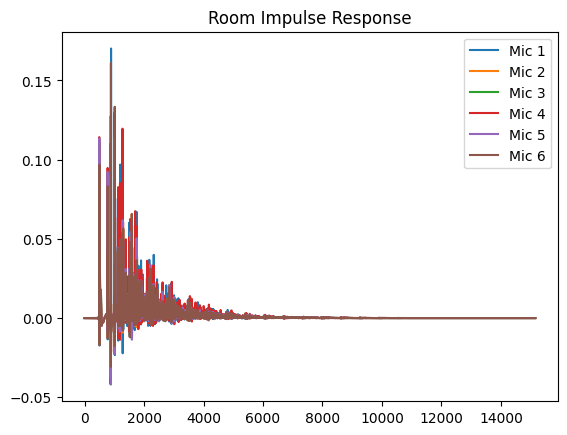

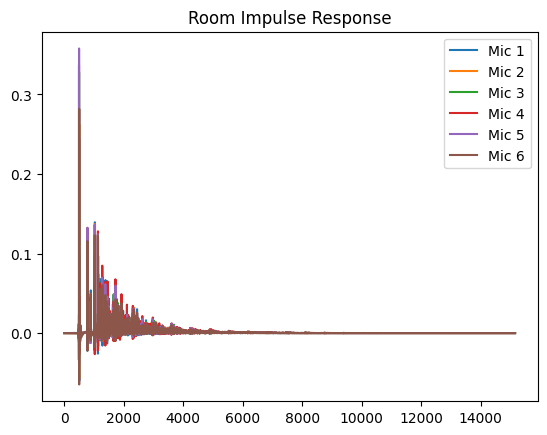

In [6]:
# simulate from measured source directivity
data_paths = [path for path in Path("../3707708").rglob("*.mat") if path.parent.name == "DirPat_singing_voice"]
measured_directivity_file_path = data_paths[0]
print(f"Using measured directivity data from {measured_directivity_file_path}")
measured_directivity_data: PyData = MatData.from_file(measured_directivity_file_path).to_pydata()

orientations = [[0], [90], [180], [270]]

for orientation in orientations:
    hrtf = pra.MeasuredDirectivity(orientation=pra.Rotation3D(orientation, rot_order="z"),
                                grid=measured_directivity_data.grid,
                                impulse_responses=measured_directivity_data.impulse_responses,
                                fs=measured_directivity_data.fs)
    simulated_signal = simulate_orientation(signal, hrtf)
    save_audio(f"measured_directivity_{orientation}.wav", simulated_signal.T, hrtf.fs)

In [5]:
data_paths = [path for path in Path("../3707708").rglob("*.mat") if path.parent.name == "DirPat_singing_voice"]

orientations = [[0], [90], [180], [270]]

for data_path in tqdm(data_paths, desc="Simulating measured directivity"):
    measured_directivity_data: PyData = MatData.from_file(data_path).to_pydata()
    for orientation in orientations:
        hrtf = pra.MeasuredDirectivity(orientation=pra.Rotation3D(orientation, rot_order="y"),
                                    grid=measured_directivity_data.grid,
                                    impulse_responses=measured_directivity_data.impulse_responses,
                                    fs=measured_directivity_data.fs)
        simulated_signal = simulate_orientation(signal, hrtf, plot=False)
        out_dir = Path(f"../simulations/{data_path.stem}")
        out_dir.mkdir(parents=True, exist_ok=True)
        save_audio(f"{out_dir}/{data_path.stem}_{orientation}.wav", simulated_signal.T, hrtf.fs)

Simulating measured directivity: 100%|██████████| 8/8 [1:39:03<00:00, 742.94s/it] 
